# APPLIED MACHINE LEARNING ASSIGNMENT 2

Lecturer's Name: Paul <br />
Student Name: Yap Li Xen (Kelvin) <br />
Student ID: P7414389 <br />
Class: DSAI/2021

# PART A: CLUSTERING

### Contents
1. Data Preparation <br />
2. Preprocessing & Scaling <br />
3. K-Means Clustering <br />
4. Hierarchical Clustering - AgglomerativeClustering<br />
5. Gaussian Mixture Model (GMM) Clustering

Data Preparation
==============

### Understand Dataset
Wine Dataset from https://archive.ics.uci.edu/ml/datasets/wine

![](image\dataset_info.png)

### Import Dataset

In [1]:
import pandas as pd

colHeaders = ["Class", "Alcohol", "Malic Acid", "Ash", 
              "Alcalinity Of Ash", "Magnesium", "Total Phenols", "Flavanoids", 
              "Nonflavanoid Phenols", "Proanthocyanins", "Color Intensity", "Hue", 
              "Od280/Od315 Of Diluted Wines", "Proline"]

df = pd.read_csv("data/wine.data", 
                 sep=",", 
                 names=colHeaders)
df.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity Of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Od280/Od315 Of Diluted Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### List DataFrame Info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity Of Ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total Phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid Phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color Intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  Od280/Od315 Of Diluted Wines  178 non-null    float64
 13  Proli

In [3]:
df = df.drop("Class", 1)
df.head()

,Alcohol,Malic Acid,Ash,Alcalinity Of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Od280/Od315 Of Diluted Wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Preprocessing & Scaling
=====================

### Standardization
Standardizing the features in order to make data centred around 0 with a standard deviation of 1

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(df)

print("Data Shape: {}".format(data_std.shape))
pd.DataFrame(data_std).head()

Data Shape: (178, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### Dimension Reduction (PCA)
To find the most important features with highest variances. <br />
First, to include all 13 features and view the variances

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=13)
data_pca = pca.fit_transform(data_std)

print("Data Shape: {}".format(data_pca.shape))
pd.DataFrame(data_pca).head()

Data Shape: (178, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


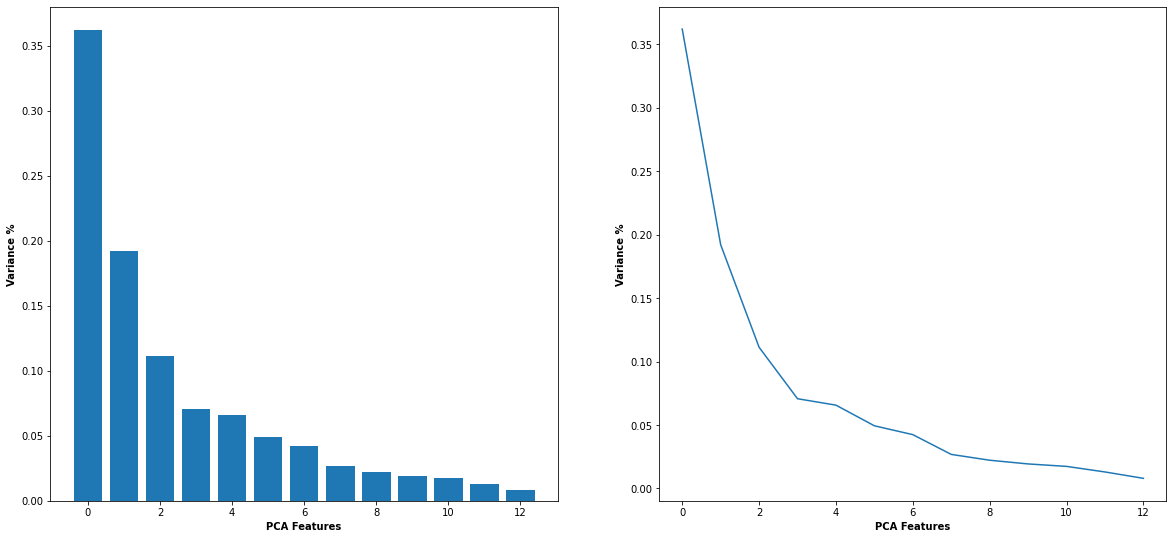

In [6]:
import matplotlib.pyplot as plt

features = range(pca.n_components_)
plt.figure(figsize=(20,20))

plt.subplot(221)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel("PCA Features", fontweight="bold")
plt.ylabel("Variance %", fontweight="bold")

plt.subplot(222)
plt.plot(features, pca.explained_variance_ratio_)
plt.xlabel("PCA Features", fontweight="bold")
plt.ylabel("Variance %", fontweight="bold")

plt.show()

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)

print("Data Shape: {}".format(data_pca.shape))
pd.DataFrame(data_pca).head()

Data Shape: (178, 2)


,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


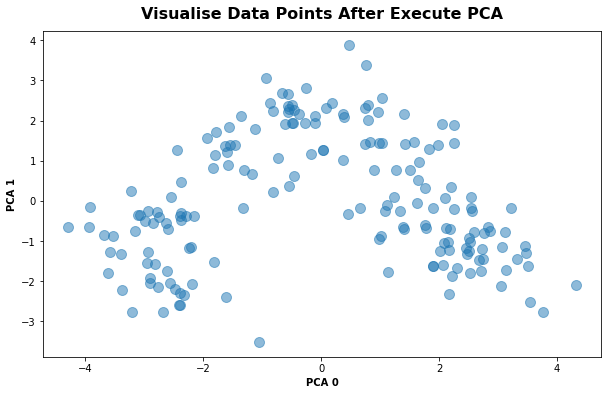

In [8]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Visualise Data Points After Execute PCA", fontsize=16, fontweight="bold", pad=12)
ax.scatter(data_pca[:,0], data_pca[:,1], s=100, alpha=0.5)

ax.set_xlabel("PCA 0", fontweight="bold")
ax.set_ylabel("PCA 1", fontweight="bold")
plt.show()

In [9]:
# Assign data to X_data
X_data = data_pca

K-Means Clustering
=================

### Clustering with different possible values of k
Create a function to plot different values of k <br />
Total 5 scatter plot with k values = 2,3,4,5,10

In [10]:
from sklearn.cluster import KMeans

def plot_kmeans_cluster(k, X):
    kmodel = KMeans(n_clusters=k)
    kmodel.fit(X)
    y_kmeans = kmodel.predict(X)
    centers = kmodel.cluster_centers_

    f, ax = plt.subplots(figsize=(10, 6))
    ax.set_title("Clustering with k-value = {}".format(k), fontsize=16, fontweight="bold", pad=12)
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, alpha=0.5, label="Data Points")
    ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5, marker="D", label="Centroid")
    
    ax.set_xlabel("PCA 0", fontweight="bold")
    ax.set_ylabel("PCA 1", fontweight="bold")
    ax.legend(loc='best')
    plt.show()

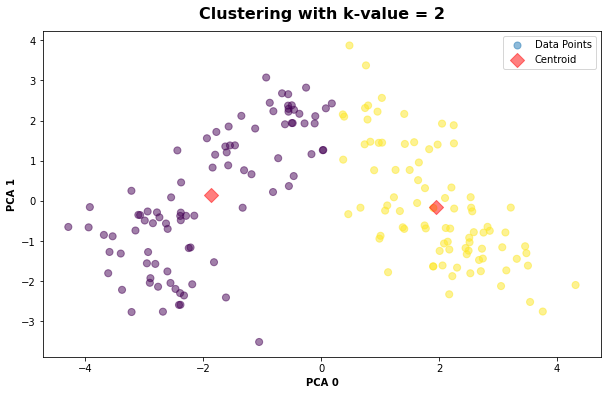

In [11]:
plot_kmeans_cluster(2, X_data)

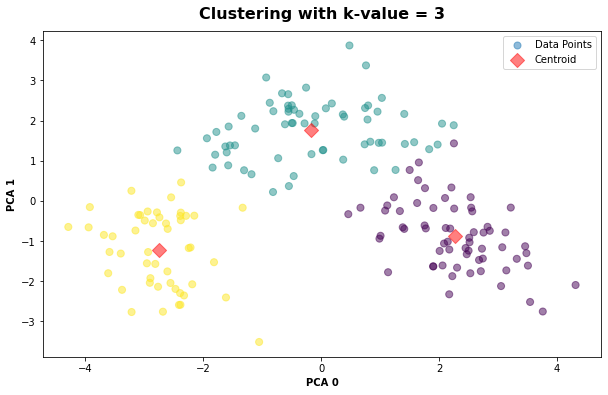

In [12]:
plot_kmeans_cluster(3, X_data)

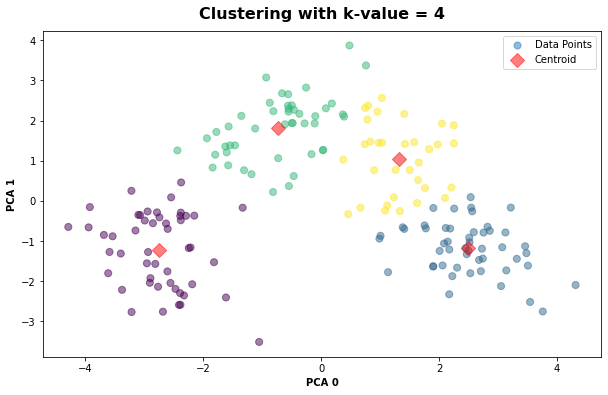

In [13]:
plot_kmeans_cluster(4, X_data)

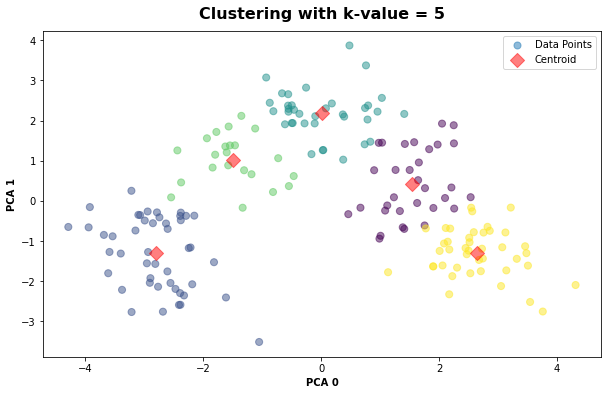

In [14]:
plot_kmeans_cluster(5, X_data)

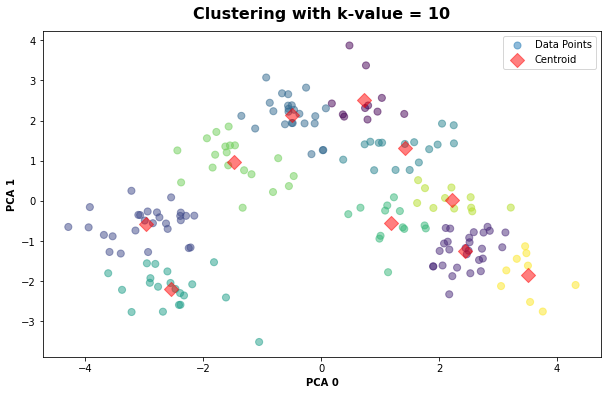

In [15]:
plot_kmeans_cluster(10, X_data)

### Determine the best possible value of k
Using silhouette_score metrics to find the highest Silhouette Coefficient for different values of k

In [16]:
from sklearn.metrics import silhouette_score

x = []
y = []
for k in range(2, 16): 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_data)
    
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_data, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))
    
    x.append(k)
    y.append(sil_coeff)

For n_clusters=2, The Silhouette Coefficient is 0.46491409089201524
For n_clusters=3, The Silhouette Coefficient is 0.5610505693103245
For n_clusters=4, The Silhouette Coefficient is 0.49142133957103157
For n_clusters=5, The Silhouette Coefficient is 0.4411644097008515
For n_clusters=6, The Silhouette Coefficient is 0.4322751066977238
For n_clusters=7, The Silhouette Coefficient is 0.42357060607218666
For n_clusters=8, The Silhouette Coefficient is 0.40830820016690056
For n_clusters=9, The Silhouette Coefficient is 0.41135793817384564
For n_clusters=10, The Silhouette Coefficient is 0.38513786238777653
For n_clusters=11, The Silhouette Coefficient is 0.40208342355257165
For n_clusters=12, The Silhouette Coefficient is 0.39831585137266623
For n_clusters=13, The Silhouette Coefficient is 0.3809775731540465
For n_clusters=14, The Silhouette Coefficient is 0.40783048097168445
For n_clusters=15, The Silhouette Coefficient is 0.41186730167972635


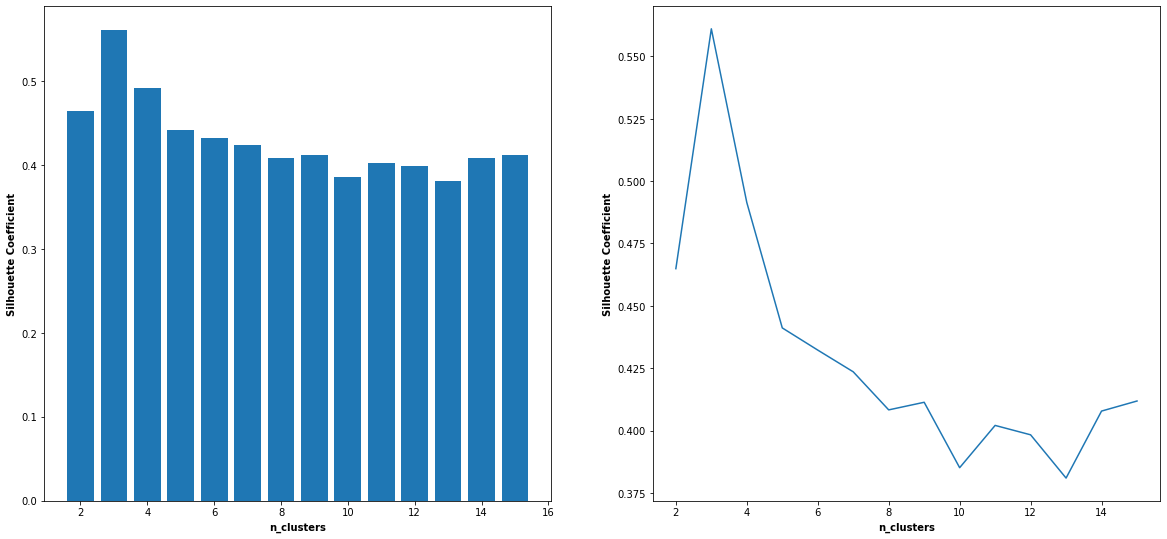

In [17]:
plt.figure(figsize=(20,20))

plt.subplot(221)
plt.bar(x, y)
plt.xlabel("n_clusters", fontweight="bold")
plt.ylabel("Silhouette Coefficient", fontweight="bold")

plt.subplot(222)
plt.plot(x, y)
plt.xlabel("n_clusters", fontweight="bold")
plt.ylabel("Silhouette Coefficient", fontweight="bold")

plt.show()

Hierarchical Clustering - AgglomerativeClustering
=========================================

### Determine the best possible number of n_clusters
Using dendrogram to find the optimal number of clusters <br />
We can see the largest vertical distance that doesn’t intersect any of the other clusters (between ~10-27), the number of vertical lines going through the horizontal line is 3. <br />
Thus, the optimal number is 3.

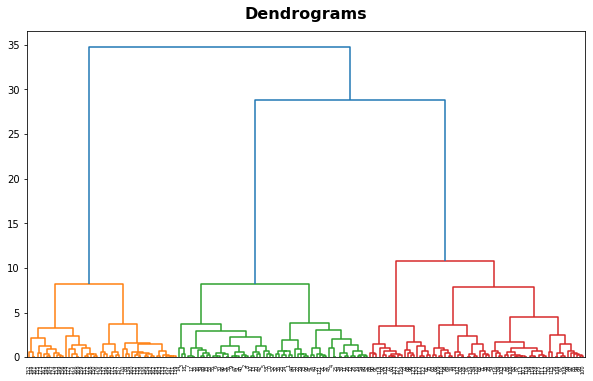

In [18]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 6))  
plt.title("Dendrograms", fontsize="16", fontweight="bold", pad=12)  
dendrogram = sch.dendrogram(sch.linkage(X_data, method='ward'))

### Clustering with AgglomerativeClustering
Clustering with AgglomerativeClusteringafter after determine the best number of clusters

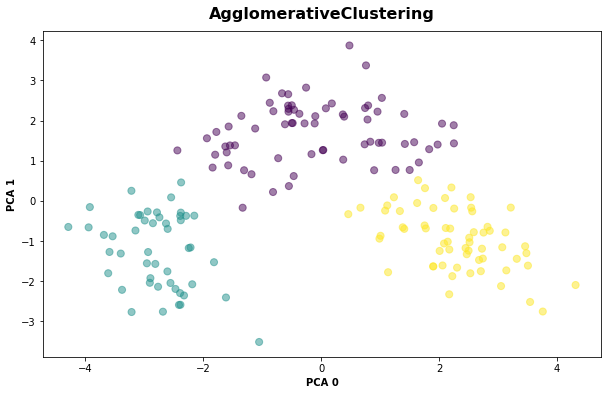

In [19]:
from sklearn.cluster import AgglomerativeClustering

hie = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hie.fit(X_data)
labels = hie.labels_

f, ax = plt.subplots(figsize=(10, 6))
ax.set_title("AgglomerativeClustering", fontsize=16, fontweight="bold", pad=12)
ax.scatter(X_data[:, 0], X_data[:, 1], c=labels, s=50, alpha=0.5)

ax.set_xlabel("PCA 0", fontweight="bold")
ax.set_ylabel("PCA 1", fontweight="bold")
plt.show()

Gaussian Mixture Model (GMM) Clustering
===================================

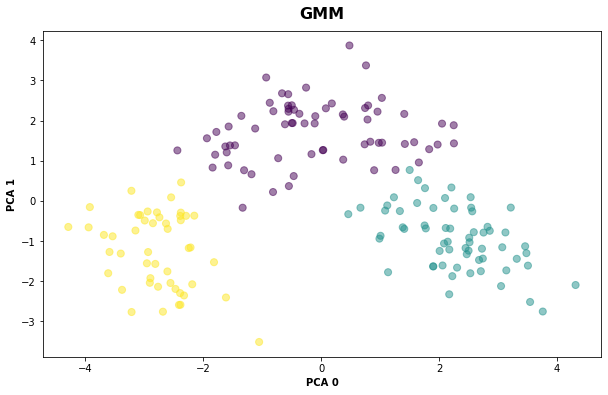

In [20]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm.fit(X_data)

labels = gmm.predict(X_data)
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title("GMM", fontsize=16, fontweight="bold", pad=12)
ax.scatter(X_data[:, 0], X_data[:, 1], c=labels, s=50, alpha=0.5)

ax.set_xlabel("PCA 0", fontweight="bold")
ax.set_ylabel("PCA 1", fontweight="bold")
plt.show()